
# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







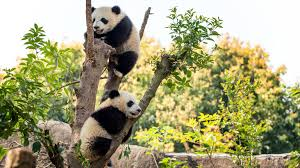


In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format


# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [ ]:
! git clone https://github.com/nhsengland/Digdata

Cloning into 'Digdata'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 238.24 KiB | 7.01 MiB/s, done.
Resolving deltas: 100% (21/21), done.


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [ ]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405
1,2021,202101,LONDON,Agomelatine,411,18228
2,2021,202101,MIDLANDS,Agomelatine,252,12345
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183
4,2021,202101,NORTH WEST,Agomelatine,119,4784
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149310
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178710


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [ ]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [ ]:
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

importdf.head(5)

sorted_df = importdf.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=True)['ITEMS'].sum().sort_values(ascending=False)
final_df = sorted_df.head(10)

final_df

,ITEMS
BNF_CHEMICAL_SUBSTANCE,
Sertraline hydrochloride,85402251
Amitriptyline hydrochloride,59272937
Citalopram hydrobromide,52891620
Mirtazapine,46335570
Fluoxetine hydrochloride,28211759
Venlafaxine,21447209
Duloxetine hydrochloride,14262656
Escitalopram,6580386
Paroxetine hydrochloride,4886615


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [ ]:
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
importdf.head(5)

costdf = importdf[importdf['BNF_CHEMICAL_SUBSTANCE']=='Mirtazapine']
costdf[['YEAR', 'YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE', 'COST']] #Calculate total cost across time period

total_cost = costdf['COST'].sum()
#if we want an average
print("Total Cost across all months:", total_cost/46)


#if we want them aggregated
aggregated_cost = costdf.groupby('YEAR_MONTH', as_index=False)['COST'].sum()
aggregated_cost



Total Cost across all months: 1353820.9719565215


,YEAR_MONTH,COST
0,202101,2380031
1,202102,2249221
2,202103,2523008
3,202104,2039348
4,202105,1935629
5,202106,2055821
6,202107,1609248
7,202108,1539582
8,202109,1621384
9,202110,1356643


### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [ ]:
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
importdf.head(5)


costdf = importdf[importdf['BNF_CHEMICAL_SUBSTANCE']=='Sertraline hydrochloride']
midlandsdf = costdf[costdf['REGION_NAME']=='MIDLANDS']

#if we want one lump value, averaged
total_cost = midlandsdf['COST'].sum()
print("Total Cost across all months:", total_cost/4)


#if we want per year
yearlydf = midlandsdf.groupby('YEAR', as_index=True)['COST'].sum().sort_index()
yearlydf









Total Cost across all months: 9901587.8125


,COST
YEAR,
2021,17477276
2022,6433864
2023,7600322
2024,8094889


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

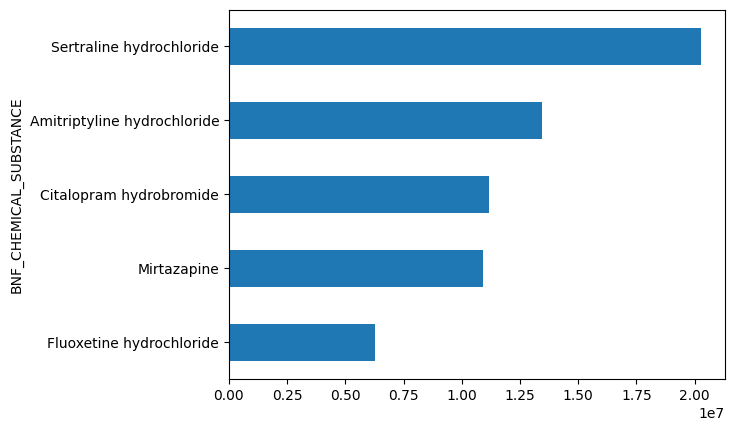

In [ ]:
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

importdf.head(5)

sorted_df = importdf[importdf['YEAR']==2024]

plotdf = sorted_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=True)['ITEMS'].sum().sort_values(ascending=True)
plotdf


plotdf_5 = plotdf.tail(5)
plotdf_5

#ax =plotdf_5.plot.barh(x='BNF_CHEMICAL_SUBSTANCE', y='ITEMS')

ax = plotdf_5.plot.barh()


### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


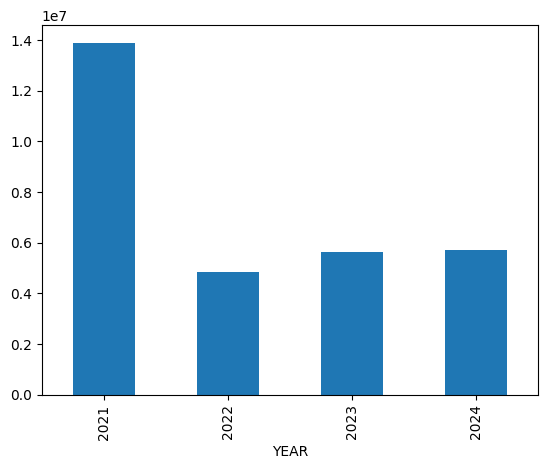

In [ ]:
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
importdf.head(5)


costdf = importdf[importdf['BNF_CHEMICAL_SUBSTANCE']=='Sertraline hydrochloride']
midlandsdf = costdf[costdf['REGION_NAME']=='NORTH WEST']
finaldf = midlandsdf.groupby('YEAR', as_index=True)['COST'].sum().sort_index()

ax = finaldf.plot.bar(x='YEAR', y="COST")







### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

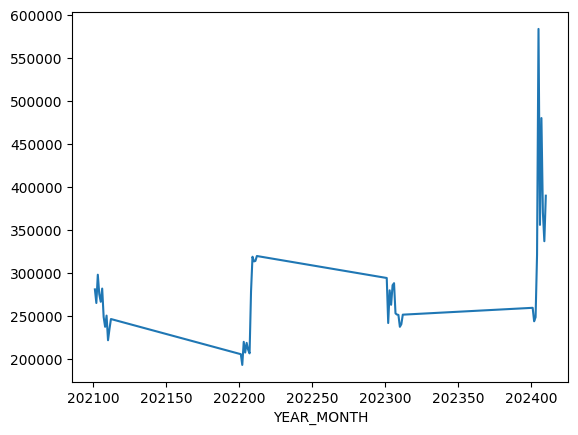

In [ ]:
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
importdf.head(5)


costdf = importdf[importdf['BNF_CHEMICAL_SUBSTANCE']=='Escitalopram']
costdf

finaldf = costdf.groupby('YEAR_MONTH', as_index=True)['COST'].sum().sort_index()

ax = finaldf.plot.line(x='YEAR_MONTH', y="COST")

# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

(0.0, 31933609.64)

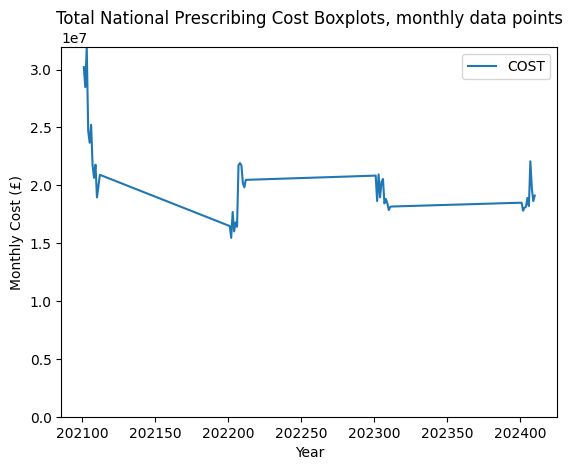

In [ ]:

importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
importdf

newdf = importdf.groupby(['YEAR_MONTH'], as_index=False)['COST'].sum()

ax = newdf.plot.line(y='COST', x='YEAR_MONTH')

# Set the title and axis labels (using pandas' built-in functionality)
ax.set_title("Total National Prescribing Cost Boxplots, monthly data points")
ax.set_ylabel("Monthly Cost (£)")
ax.set_xlabel("Year")
ax.set_ylim(0, newdf['COST'].max())


### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [ ]:

importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
importdf

newdf = importdf.groupby(['YEAR_MONTH', 'YEAR'], as_index=False)['COST'].sum()

for year, group in newdf.groupby('YEAR'):
    print(f"Statistics for YEAR {year}:\n")
    print(group['COST'].quantile([0.25, 0.50, 0.75]).to_frame(name='COST'))  # Q1, median, Q3
    print(f"Max: {group['COST'].max()}\n")  #


Statistics for YEAR 2021:

      COST
0 20835485
0 22724240
1 26036580
Max: 31933609.64

Statistics for YEAR 2022:

      COST
0 16458373
0 18754197
1 20776870
Max: 21914896.72

Statistics for YEAR 2023:

      COST
0 18362788
0 18722910
1 20344160
Max: 20934041.830000002

Statistics for YEAR 2024:

      COST
0 18163828
0 18560027
1 19056284
Max: 22071625.09




### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

Text(0.5, 0, 'Year')

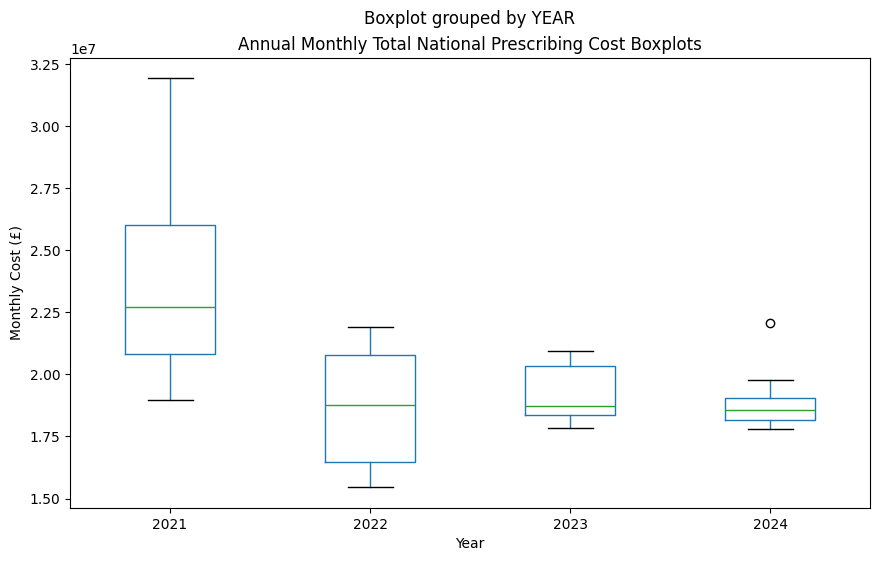

In [ ]:

importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
importdf

tdf = importdf.groupby(['YEAR_MONTH', 'YEAR'], as_index=False)['COST'].sum()


# Generate separate boxplots for each year in one line
ax = tdf.boxplot(column='COST', by='YEAR', grid=False, figsize=(10, 6))

# Set the title and axis labels (using pandas' built-in functionality)
ax.set_title("Annual Monthly Total National Prescribing Cost Boxplots")
ax.set_ylabel("Monthly Cost (£)")
ax.set_xlabel("Year")




### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

<Axes: title={'center': 'Annual Mean Monthly Total National Prescribing Cost'}, xlabel='YEAR', ylabel='Mean Monthly Cost (£), scientific notation'>

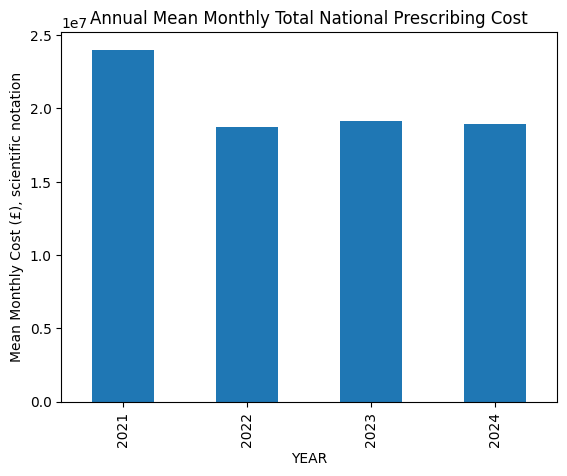

In [ ]:

importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
importdf

newdf = importdf.groupby(['YEAR_MONTH', 'YEAR'], as_index=False)['COST'].sum()

annual_means = newdf.groupby('YEAR')['COST'].mean()

# Plot using Pandas
annual_means.plot(kind='bar', title="Annual Mean Monthly Total National Prescribing Cost", ylabel="Mean Monthly Cost (£), scientific notation")

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [ ]:
import pandas as pd

# Read CSV file
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')


# Group by YEAR and REGION, summing COST
grouped_df = importdf.groupby(['YEAR', 'REGION_NAME'], as_index=False)['COST'].sum()

# Pivot the table to get regions as columns and years as rows
pivot_table = grouped_df.pivot_table(index='YEAR', columns='REGION_NAME', values='COST')

# Display the pivoted table
print(pivot_table)


REGION_NAME  EAST OF ENGLAND   LONDON  MIDLANDS  NORTH EAST AND YORKSHIRE  \
YEAR                                                                        
2021                32549420 31640433  54008267                  54219524   
2022                25646511 25262951  42218785                  41628529   
2023                26095459 26264854  43734609                  43117423   
2024                21556936 21338157  36140499                  36540049   

REGION_NAME  NORTH WEST  SOUTH EAST  SOUTH WEST  
YEAR                                             
2021           41951035    44230470    29500100  
2022           31645817    35263811    22982043  
2023           32223272    35320635    23257408  
2024           26356568    28686311    18570411  


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

### 1


Text(0.5, 0, 'Year')

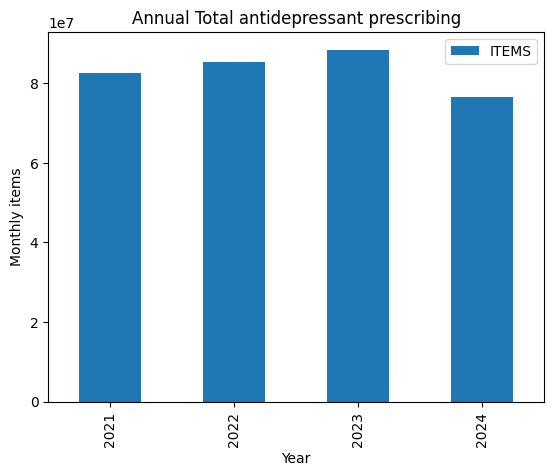

In [ ]:
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')


newdf = importdf.groupby(['YEAR'], as_index=False)['ITEMS'].sum()
ax = newdf.plot.bar( x='YEAR', y='ITEMS')
ax.set_title("Annual Total antidepressant prescribing")
ax.set_ylabel("Monthly items")
ax.set_xlabel("Year")


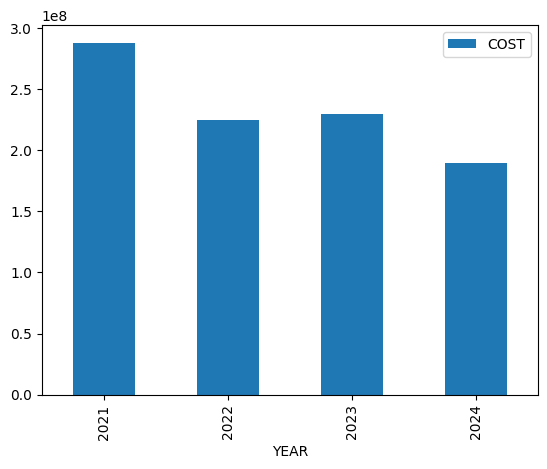

In [ ]:
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')


newdf = importdf.groupby(['YEAR'], as_index=False)['COST'].sum()
ax = newdf.plot.bar( x='YEAR', y='COST')

ax = newdf.plot.bar( x='YEAR', y='ITEMS')
ax.set_title("Annual Total antidepressant prescribing")
ax.set_ylabel("Monthly Cost(£)")
ax.set_xlabel("Year")

#### PLOTS: TOTALS

The plot showing the total annual antidepressant prescribing (items) is higher in the middle (2022 and 2023), While the chart showing total antidepressant prescribing cost has a decreasing trend.

This suggests that cost to provide these prescriptions is not necessarily directly proportional to the total number of antidepressant items provided. There could be many reasons for this- cost of drugs could decrease; the demographics of who is being prescribed them and how much they pay can be changing; and/or the actual substances and their costs to purchase may also be changing.


### 2

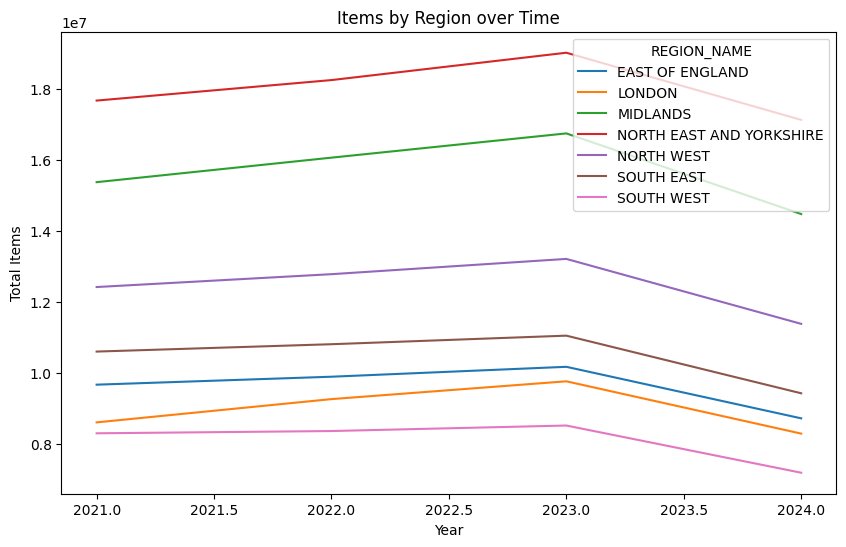

In [ ]:
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
importdf

newdf = importdf.groupby(['YEAR', 'REGION_NAME'], as_index=False)['ITEMS'].sum()
newdf

# Pivot the data to have 'YEAR' as the index and 'REGION_NAME' as columns
pivoted_df = newdf.pivot(index='YEAR', columns='REGION_NAME', values='ITEMS')

ax = pivoted_df.plot.line(figsize=(10, 6), title="Items by Region over Time")

ax.set_ylabel("Total Items")
ax.set_xlabel("Year")

ax.figure.show()

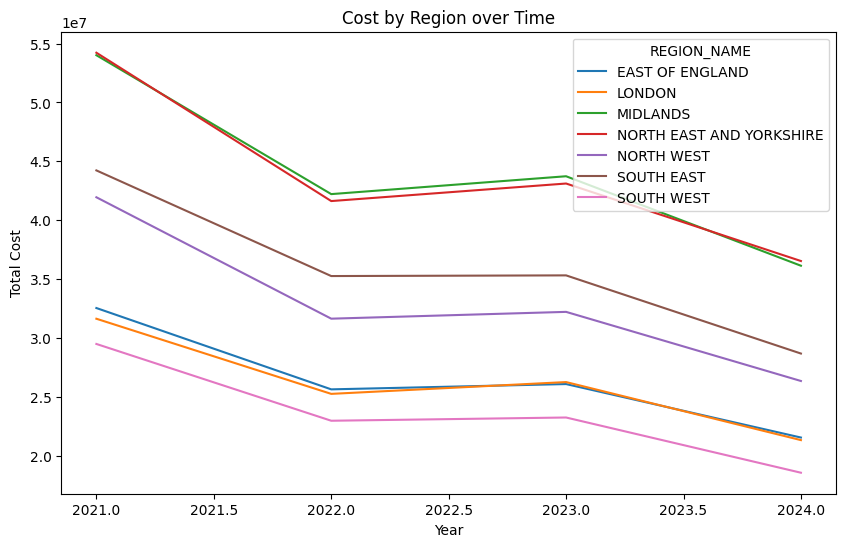

In [ ]:
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
importdf

newdf = importdf.groupby(['YEAR', 'REGION_NAME'], as_index=False)['COST'].sum()
newdf

# Pivot the data to have 'YEAR' as the index and 'REGION_NAME' as columns
pivoted_df = newdf.pivot(index='YEAR', columns='REGION_NAME', values='COST')

ax = pivoted_df.plot.line(figsize=(10, 6), title="Cost by Region over Time")

ax.set_ylabel("Total Cost")
ax.set_xlabel("Year")

ax.figure.show()

#### PLOTS: REGIONAL DATA
I added some plots after the tables to help me visualize the changes.

The table showing the total annual antidepressant prescribing per region (items) shows similar trends among many of the regions, where over the total span the number of items decreases. However, in all plots, this value peaks at the beginning of 2023. The London region stayed the most constant over this time span, with its endpoint very similar to its start value.

The table showing the annual antidepressant prescribing cost per region also shows simlar trends- decreasing in all regions over the span of 2021-2024. Not all regions had the same slope of decrease- for instance, the decrease in the regions with lower costs overall (e.g. London,South West) experienced less rate of drug cost decrease than did those that had higher initial starting prices (e.g. Midlands, North East and Yorkshire).

Both of these plots broadly match what is observed in part 1.

### 3

[Text(0, 0, 'Trazodone hydrochloride'),
 Text(1, 0, 'Paroxetine hydrochloride'),
 Text(2, 0, 'Escitalopram'),
 Text(3, 0, 'Duloxetine hydrochloride'),
 Text(4, 0, 'Venlafaxine'),
 Text(5, 0, 'Fluoxetine hydrochloride'),
 Text(6, 0, 'Mirtazapine'),
 Text(7, 0, 'Citalopram hydrobromide'),
 Text(8, 0, 'Amitriptyline hydrochloride'),
 Text(9, 0, 'Sertraline hydrochloride')]

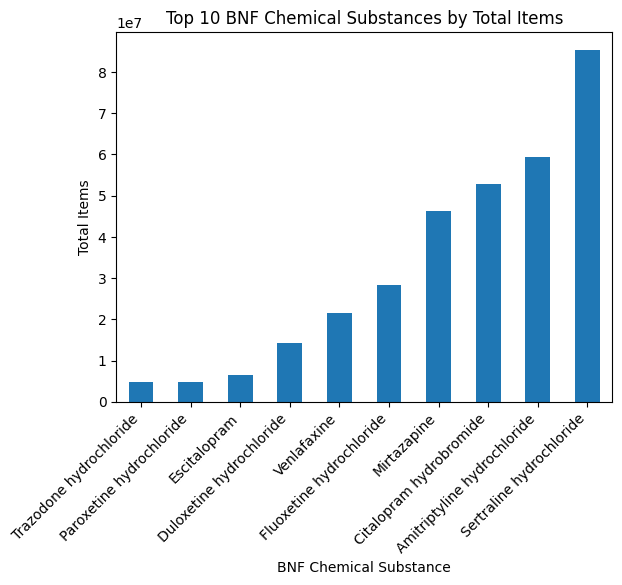

In [ ]:
Bimportdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

importdf.head(5)

newdf = importdf.groupby(['BNF_CHEMICAL_SUBSTANCE'], as_index=False)['ITEMS'].sum()


plotdf = newdf.sort_values(by='ITEMS')

ax = plotdf.tail(10).plot.bar(x='BNF_CHEMICAL_SUBSTANCE', y='ITEMS', legend=False)


ax.set_title('Top 10 BNF Chemical Substances by Total Items')
ax.set_xlabel('BNF Chemical Substance')
ax.set_ylabel('Total Items')

# Rotating the x-axis labels to make them more readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


[Text(0, 0, 'Tranylcypromine sulfate'),
 Text(1, 0, 'Trimipramine maleate'),
 Text(2, 0, 'Vortioxetine'),
 Text(3, 0, 'Duloxetine hydrochloride'),
 Text(4, 0, 'Mirtazapine'),
 Text(5, 0, 'Citalopram hydrobromide'),
 Text(6, 0, 'Fluoxetine hydrochloride'),
 Text(7, 0, 'Amitriptyline hydrochloride'),
 Text(8, 0, 'Venlafaxine'),
 Text(9, 0, 'Sertraline hydrochloride')]

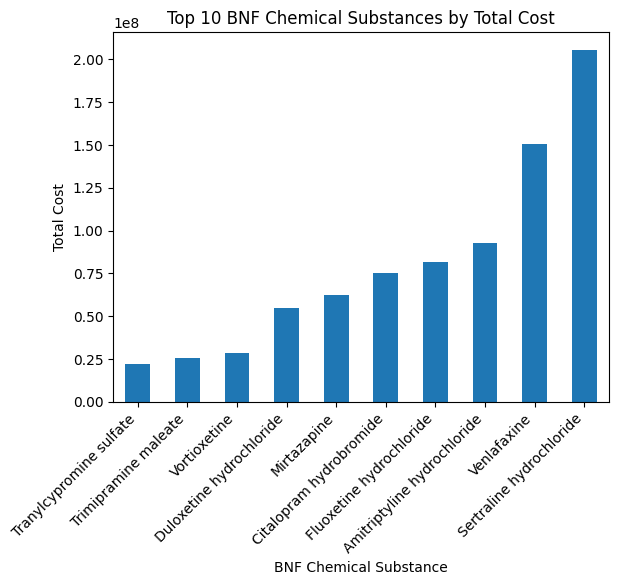

In [ ]:
importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

newdf = importdf.groupby(['BNF_CHEMICAL_SUBSTANCE'], as_index=False)['COST'].sum()

ax = newdf.sort_values(by='COST').tail(10).plot.bar(x='BNF_CHEMICAL_SUBSTANCE', y='COST', legend=False)

ax.set_title('Top 10 BNF Chemical Substances by Total Cost')
ax.set_xlabel('BNF Chemical Substance')
ax.set_ylabel('Total Cost')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


#### PLOTS: SPECIFIC DRUGS

The bar chart for the 10 most prescribed antidepressants across the four years has Sertraline hydrochloride in the #1 splot, as does the
bar chart that shows antidepressants with the greatest total prescribing cost across the entire four year period. However, from there the pattern falls apart. Amitryptyline hydrochloride is the second most prescribed drug, but only third costliest. Escitralopam must be quite low cost, as it has a very high number of prescriptions but does not make it in the top 10 of the cost chart. This shows that drug cost is highly variable, and some must be much more costly than others.

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


## Longitudinal trends

<ipython-input-149-d80a1211e7c6>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


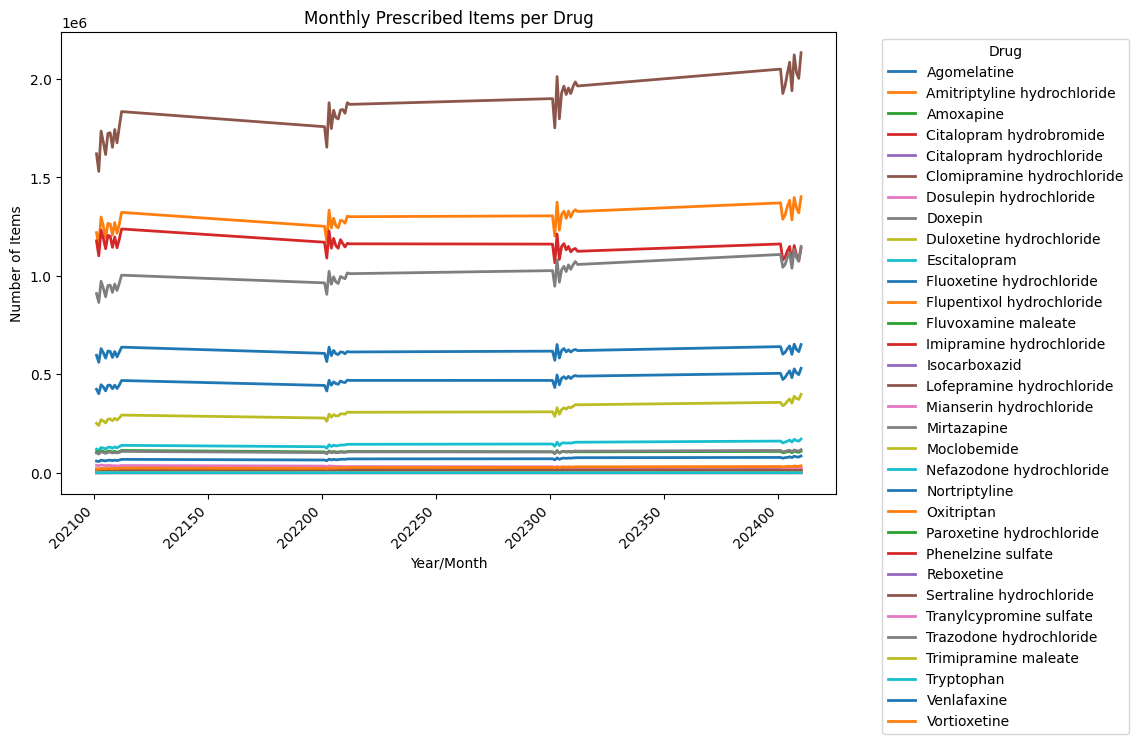

In [ ]:

importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
newdf = importdf.groupby(['BNF_CHEMICAL_SUBSTANCE', 'YEAR_MONTH'], as_index=False)[['ITEMS']].sum()


newdf = newdf.sort_values(by=['YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE'])

pivot_items = newdf.pivot(index='YEAR_MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='ITEMS')

ax = pivot_items.plot(linewidth=2, figsize=(10, 6))

ax.set_title("Monthly Prescribed Items per Drug")
ax.set_xlabel("Year/Month")
ax.set_ylabel("Number of Items")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.legend(title="Drug", bbox_to_anchor=(1.05, 1), loc='upper left')



<ipython-input-151-72e80fca0f1d>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


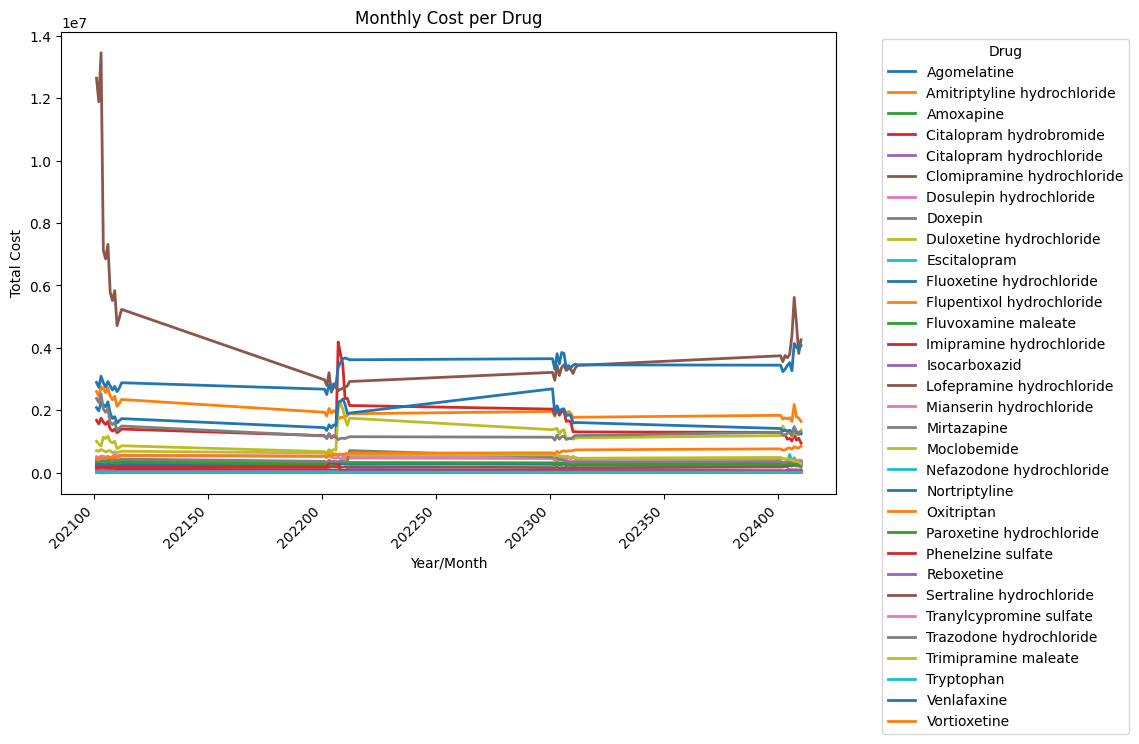

In [ ]:
import pandas as pd

importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

newdf = importdf.groupby(['BNF_CHEMICAL_SUBSTANCE', 'YEAR_MONTH'], as_index=False)[['COST']].sum()

newdf = newdf.sort_values(by=['YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE'])

pivot_cost = newdf.pivot(index='YEAR_MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='COST')

ax = pivot_cost.plot(linewidth=2, figsize=(10, 6))

ax.set_title("Monthly Cost per Drug")
ax.set_xlabel("Year/Month")
ax.set_ylabel("Total Cost")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.legend(title="Drug", bbox_to_anchor=(1.05, 1), loc='upper left')


These plots that display time points over monthly values suggest that the changes in cost seen in the prior plots are not being driven by differential presciption numbers of different drug types, as all drugs are experiencing similar trends. The less-commonly prescribed drugs certainly have less variability in their prescription numbers.

One could argue that the one drug that experienced the largest increase, which is Sertraline hydrochloride, and which is overall the #1 costliest drug (report section 1, plot 3b) might have something to do with it- but the second plot in this section shows a precipitous drop in the monthly of this drug after being initially much more costly per unit (since the prescription numbers did not have a corresponding drop) than all other drugs.

Overall, Cost per drug is decreasing year-by-year and prescription numbers and montly cost per drug are more roughly stable over the period from 2021-2024, and there are enough different drugs being used at volume that no one drug has an exceedingly outsize impact (high cost proportional to items) as of the last data point.

## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.



#### Drug: Imipramine hydrochloride

proportional cost of Imipramine hydrochloride: 0.41354545412306665%
proportional items of Imipramine hydrochloride: 0.13014625562565257%
cost per item of Imipramine hydrochloride: 8.890760620824567%


[Text(202050.0, 0, '202050'),
 Text(202100.0, 0, '202100'),
 Text(202150.0, 0, '202150'),
 Text(202200.0, 0, '202200'),
 Text(202250.0, 0, '202250'),
 Text(202300.0, 0, '202300'),
 Text(202350.0, 0, '202350'),
 Text(202400.0, 0, '202400'),
 Text(202450.0, 0, '202450')]

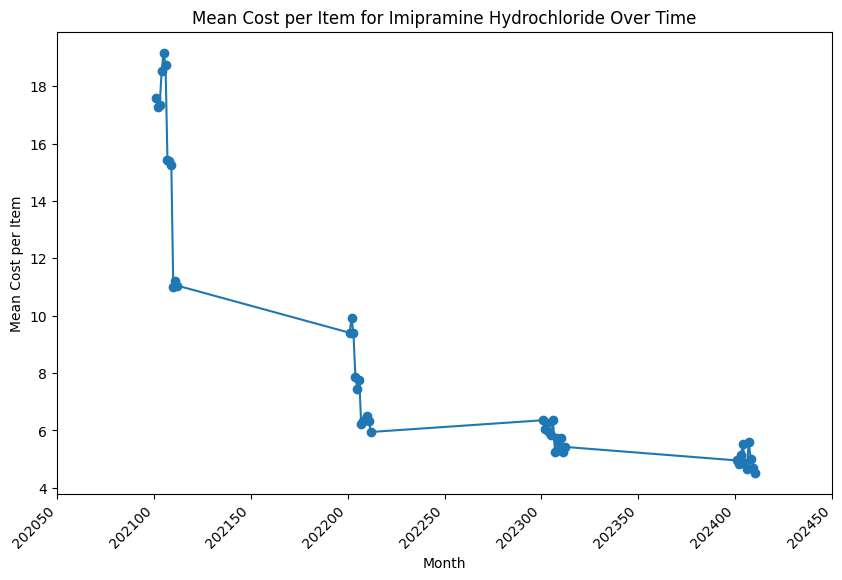

In [167]:
### total percentages

df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

total_cost = df['COST'].sum()
imipramine_cost = df.loc[df['BNF_CHEMICAL_SUBSTANCE'] == 'Imipramine hydrochloride', 'COST'].sum()
percentage_cost = (imipramine_cost / total_cost) * 100

total_items = df['ITEMS'].sum()
imipramine_items = df.loc[df['BNF_CHEMICAL_SUBSTANCE'] == 'Imipramine hydrochloride', 'ITEMS'].sum()
percentage_items = (imipramine_items / total_items) * 100
mean_cost_per_item = imipramine_cost / imipramine_items

print(f"proportional cost of Imipramine hydrochloride: {percentage_cost}%")
print(f"proportional items of Imipramine hydrochloride: {percentage_items}%")

print(f"cost per item of Imipramine hydrochloride: {mean_cost_per_item}%")

## per month:
imipramine_df = importdf[importdf['BNF_CHEMICAL_SUBSTANCE'] == 'Imipramine hydrochloride']
imipramine_df = imipramine_df.groupby('YEAR_MONTH', as_index=False).sum()
imipramine_df['MEAN_COST_PER_ITEM'] = imipramine_df['COST'] / imipramine_df['ITEMS']

ax = imipramine_df.plot(x='YEAR_MONTH', y='MEAN_COST_PER_ITEM', kind='line', marker='o', figsize=(10, 6), legend=False)

ax.set_title("Mean Cost per Item for Imipramine Hydrochloride Over Time")
ax.set_xlabel("Month")
ax.set_ylabel("Mean Cost per Item")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



<ipython-input-169-af1ddea8219a>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-169-af1ddea8219a>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


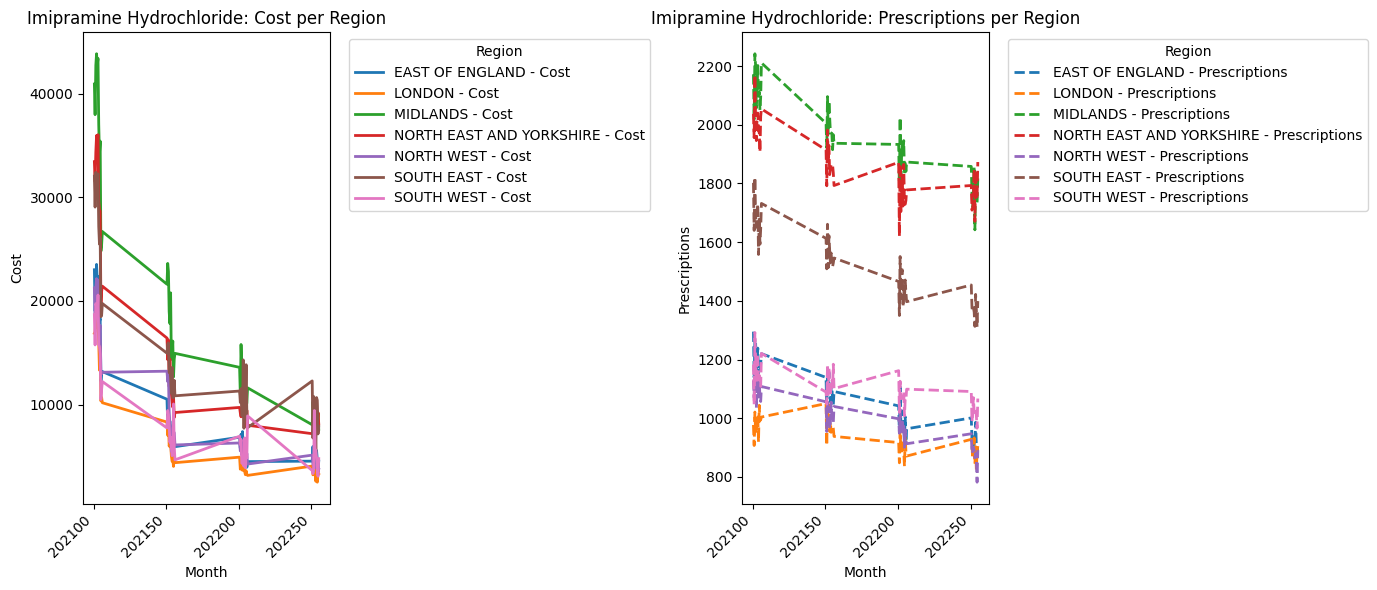

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importdf = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

costdf = importdf[importdf['BNF_CHEMICAL_SUBSTANCE'] == 'Imipramine hydrochloride']

newdf = costdf.groupby(['REGION_NAME', 'YEAR_MONTH'], as_index=False)[['COST', 'ITEMS']].sum()
newdf = newdf.sort_values(by=['YEAR_MONTH', 'REGION_NAME'])

pivot_cost = newdf.pivot(index='YEAR_MONTH', columns='REGION_NAME', values='COST')
pivot_items = newdf.pivot(index='YEAR_MONTH', columns='REGION_NAME', values='ITEMS')

# Create a color palette based on the number of regions
regions = pivot_cost.columns
palette = sns.color_palette("tab10", n_colors=len(regions))

# Create a dictionary to map region names to colors
region_colors = {region: palette[i] for i, region in enumerate(regions)}

# Create two subplots: one for cost (solid) and one for prescriptions (dotted)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot cost (solid lines) on ax1
for region in regions:
    ax1.plot(pivot_cost.index, pivot_cost[region], label=f'{region} - Cost', linestyle='-', linewidth=2, color=region_colors[region])

ax1.set_title("Imipramine Hydrochloride: Cost per Region")
ax1.set_xlabel("Month")
ax1.set_ylabel("Cost")
ax1.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot prescriptions (dotted lines) on ax2
for region in regions:
    ax2.plot(pivot_items.index, pivot_items[region], label=f'{region} - Prescriptions', linestyle='--', linewidth=2, color=region_colors[region])

ax2.set_title("Imipramine Hydrochloride: Prescriptions per Region")
ax2.set_xlabel("Month")
ax2.set_ylabel("Prescriptions")
ax2.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to ensure the labels fit properly
plt.tight_layout()
plt.show()





My analysis of Imipramine hydrochloride suggests that while it takes up nearly half of all prescription costs over the full time period, its mean cost per item has decreased dramatically over the time span (From nearly 18 pounds to under 6 pounds) .This trend, according to my last plot, holds for all regions. However, interestingly, not all regions experience the same mean price per unit- for instance, cost is similar between the North East, South East, and Midlands, but the midlands prescription number is lower- indicating an aberrantly high cost per unit there.

Overall, this drug's greatly decreased price means that over a longer time interval into the future, its contribution to the proportion of total costs should get lower and lower.